<a href="https://colab.research.google.com/github/Giffy/Mobility_AIBCN/blob/master/3_Dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset creation

Creation of mobile phone density images of Barcelona

In [0]:
import pandas as pd
import seaborn
import seaborn as sns

##  Download data

In [5]:
# Download previously cleaned data from 'Github'
!pip install wget > /dev/null
import wget
url = 'https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/coverageCatHDv6.tar.gz'
try:
  filename = wget.download(url)
  print ( 'Dataset downloaded successfully.')

  # Extract tar file
  import tarfile
  tf = tarfile.open( filename )
  tf.extractall()
  
except:
  print ( 'Error downloading dataset.')


Dataset downloaded successfully.


##  Load data

In [6]:
# load data
df = pd.read_csv('coverageCat.csv')
df.head(3)

,Activitat,Day,Hour,Latitude,Longitude,Month,Weekday,Year
0,UNKNOWN,17,1,41.3875,2.1980,10,6,2015
1,IN_VEHICLE,17,1,41.3860,2.1395,10,6,2015
2,IN_VEHICLE,17,1,41.3860,2.1395,10,6,2015


In [7]:
df.tail(3)

,Activitat,Day,Hour,Latitude,Longitude,Month,Weekday,Year
2879093,IN_VEHICLE,4,0,41.455,2.03,1,3,2017
2879094,IN_VEHICLE,4,0,41.455,2.03,5,4,2017
2879095,IN_VEHICLE,19,0,41.455,2.03,10,3,2016


##  Data cleansing

In [0]:
df = df[df['Activitat']=='IN_VEHICLE']                                    # Keeps in dataFrame the data with activity "IN VEHICLE"

weekdays = [1,2,3,4,5]
df = df[(df['Weekday'].isin(weekdays))]                                   # Keeps in dataFrame the data from Monday to Friday

##  Generate dataset graphics
Using seaborn to generate graphics of mobile phone density

![Density_sample](https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/plt_sample.png)



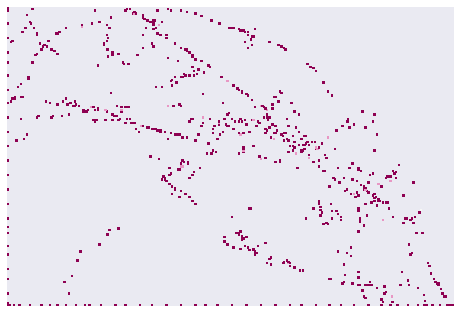

In [9]:
manana = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# Sample of plotting graphic with seaborn

df0 = df[ (df['Year']== 2017
          ) & (df['Month']== 4) & (df['Day']== 5)]
df0 = df0[(df0['Hour'].isin(manana))]  
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()
result = df0.pivot (index='Latitude' , columns='Longitude', values='Day')


sns_plot = seaborn.heatmap(result, 
                           cbar= False,                            # Removes color bar with scale 
                           xticklabels=False,                      # Removes X-axis labels
                           yticklabels=False,                      # Removes Y-axis labels
                           cmap="PiYG",                            # 2 contrasting colors
                           center=3
                          ) 

sns_plot.set_xlabel('')                                            # Removes X-axis title
sns_plot.set_ylabel('')                                            # Removes Y-axis title

fig = sns_plot.get_figure()                                        # Generates the heatmap image
#fig.savefig("output.png")                                         # Saves the image as png

In [10]:
!mkdir /content/Images
path = '/content/Images/'                                                # Path to store the heatmap images generated

# List of years, months, days and weekdays
years = [2015, 2016, 2017]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]


def generate_images ( hours ):
  
  count = 0
  df0 = df[(df['Hour'].isin(hours))]                                      # Creates a dataset within the time range selected
  for year in years:                                                      # Iteration to collect the data per each picture
    df1 = df0[(df0['Year']== year)]                                       # Selects a year from list
    for month in months:
      df2 = df1[(df1['Month']== month)]                                   # Selects a month from list
      print ("Progress: " + str(year) + '_' + str(month))
      for day in days:
        df3 = df2[(df2['Day']== day)]                                     # Selects a day from list
        df_camp = df3[(df3.Latitude > 6) & (df3.Latitude < 11) &(df3.Longitude > 6) & (df3.Longitude < 11) ]
        df4 = df3.groupby(['Latitude','Longitude'], as_index= False).count()
        result = df4.pivot (index='Latitude' , columns='Longitude', values='Day')        
        
        try:                                                              # Try to catch the error when seaborn crashes, when result is empty (weekends, some days for months shorter than 31 days)
          sns_plot = seaborn.heatmap(result, 
                                     cbar= False,                         # Removes color bar with scale 
                                     xticklabels=False,                   # Removes X-axis labels
                                     yticklabels=False,                   # Removes Y-axis labels
                                     cmap="PiYG",                         # 2 contrasting colors
                                     center=10
                                    ) 
          sns_plot.set_xlabel('')                                         # Removes X-axis title
          sns_plot.set_ylabel('')                                         # Removes Y-axis title
          #sns_plot.plt.xlim (2.030 , 2.26)
          #sns_plot.plt.ylim (41.335 , 41.46)
          
          fig = sns_plot.get_figure()                                     # Plots the heatmap image

          # Filename creation
          period = 'AM' if 8 in hours else 'PM'
          filename = str(year) + '_' + str(month) + '_' + str(day) + '_' + period + '.png' 

          fig.savefig( path + filename )                                  # Saves image as png
          fig.clf()                                                       # Cleans figure content
          sns_plot = None
          count +=1
        except:
          pass
  print ( "Created " + str(count) + " images")

mkdir: cannot create directory ‘/content/Images’: File exists


In [11]:
timing = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
generate_images ( timing )

Progress: 2015_1
Progress: 2015_2
Progress: 2015_3
Progress: 2015_4
Progress: 2015_5
Progress: 2015_6
Progress: 2015_7
Progress: 2015_8
Progress: 2015_9
Progress: 2015_10
Progress: 2015_11
Progress: 2015_12
Progress: 2016_1
Progress: 2016_2
Progress: 2016_3
Progress: 2016_4
Progress: 2016_5
Progress: 2016_6
Progress: 2016_7
Progress: 2016_8
Progress: 2016_9
Progress: 2016_10
Progress: 2016_11
Progress: 2016_12
Progress: 2017_1
Progress: 2017_2
Progress: 2017_3
Progress: 2017_4
Progress: 2017_5
Progress: 2017_6
Progress: 2017_7
Progress: 2017_8
Progress: 2017_9
Progress: 2017_10
Progress: 2017_11
Progress: 2017_12
Created 778 images


<Figure size 576x396 with 0 Axes>

## Copy dataset to Google Drive

In [12]:
from google.colab import drive
drive.mount('/gdrive')                                                   # Mounts Google Drive as a folder in google Colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!tar -czvf images.tar.gz Images > /dev/null
!mv images.tar.gz /gdrive/My\ Drive/

## Plotting data sample with Folium

In [0]:
!pip install folium geopandas  > /dev/null   # Install folium for map visualization

import folium                             # Library to create the map
from folium import plugins                # plugin to create a heatmap

In [0]:
df0 = df[ (df['Year']== 2015) & (df['Month']== 2) & (df['Day']== 6)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           

latitude = df0.loc [ : , 'Latitude']
longitude = df0.loc [ : , 'Longitude']
total = df0.loc [ : , 'Day']

In [21]:
center_lat = 41.391
center_lon = 2.137

locationmap = folium.Map(location=[ center_lat , center_lon ], zoom_start=12, width=800, height=600 )
locationmap.add_child(plugins.HeatMap(zip(latitude, longitude, total), radius = 12))

locationmap

In [0]:
locationmap.save(outfile= "test.html")

In [0]:
!cat test.html

In [0]:
!pip install selenium > /dev/null
import os
import time
from selenium import webdriver

delay=5
fn='test.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
locationmap.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('map.png')
browser.quit()

In [0]:
!find / selenium  | grep geckodriver

find: ‘/content/GDrive/My Drive/Cursos/CIFO PYTHON 2017/JOANMASDEMONT/LABORATORI-TOPICS/TEXTPLA’: Input/output error
/content/geckodriver.log
find: ‘selenium’: No such file or directory
